In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/tmp/ipython-input-1341634590.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bugs = df_cleaned.set_index('created_at').resample('M')['key'].count()


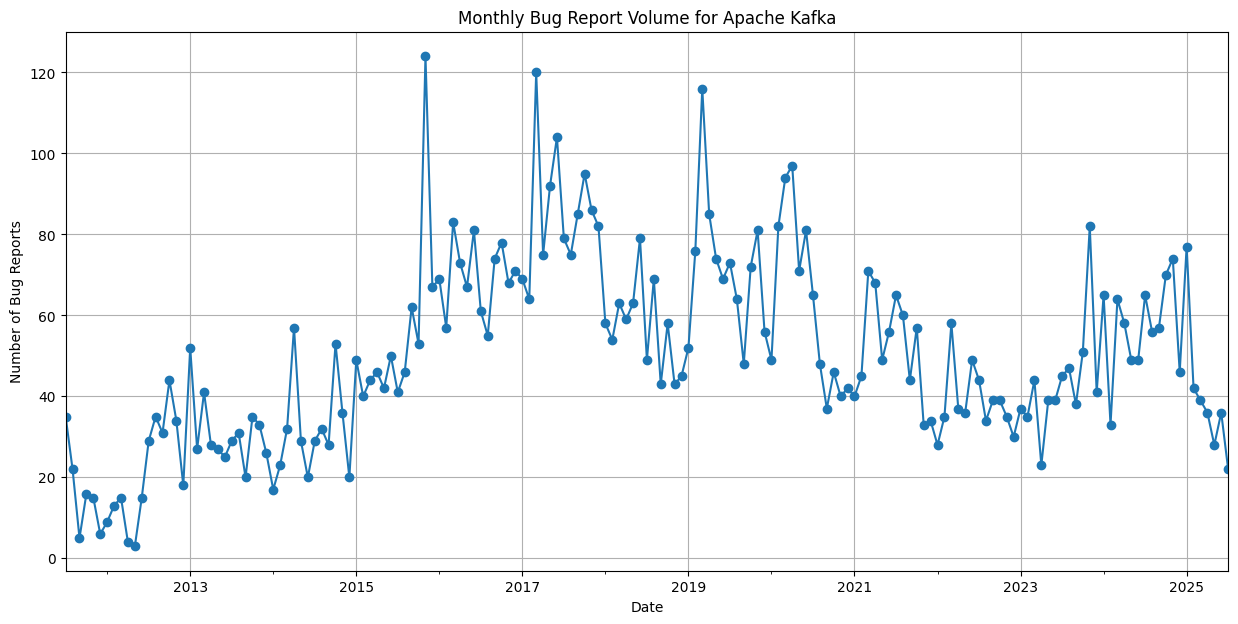

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Update the file_path with your project's location on Drive
file_path = "/content/drive/MyDrive/Portfolio/Data_analysis_projects/ApacheKafka_Bug_Analysis/data/processed/kafka_bug_reports_cleaned.csv"
df_cleaned = pd.read_csv(file_path)

# Ensure 'created_at' is in datetime format
df_cleaned['created_at'] = pd.to_datetime(df_cleaned['created_at'])

# Group by month and count the number of bugs
monthly_bugs = df_cleaned.set_index('created_at').resample('M')['key'].count()

# Plot the monthly bug volume
plt.figure(figsize=(15, 7))
monthly_bugs.plot(kind='line', title='Monthly Bug Report Volume for Apache Kafka', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Bug Reports')
plt.grid(True)
plt.show()

Overall Trend: The bug volume isn't stable. From the beginning of the data in late 2012 until around 2017, there was a clear upward trend in the number of bug reports. This could indicate a growing user base, increased complexity of the software, or a push for a more active community. After 2017, the volume appears to level out and become more volatile, with no clear long-term trend.

Significant Peaks: The most striking features are the large spikes in bug reports. You can see major peaks in mid-2016, early 2017, and mid-2019, where the bug reports exceed 120 per month.

Valleys: Notice the quiet periods, like the very low bug report volume at the beginning of the data and a more recent dip in late 2024 to early 2025.

Top 10 Most Common Components:
components
Unspecified Component    2886
streams                   925
core                      800
connect                   585
clients                   417
consumer                  306
producer                  169
clients, consumer         155
tools                     135
log                       120
Name: count, dtype: int64


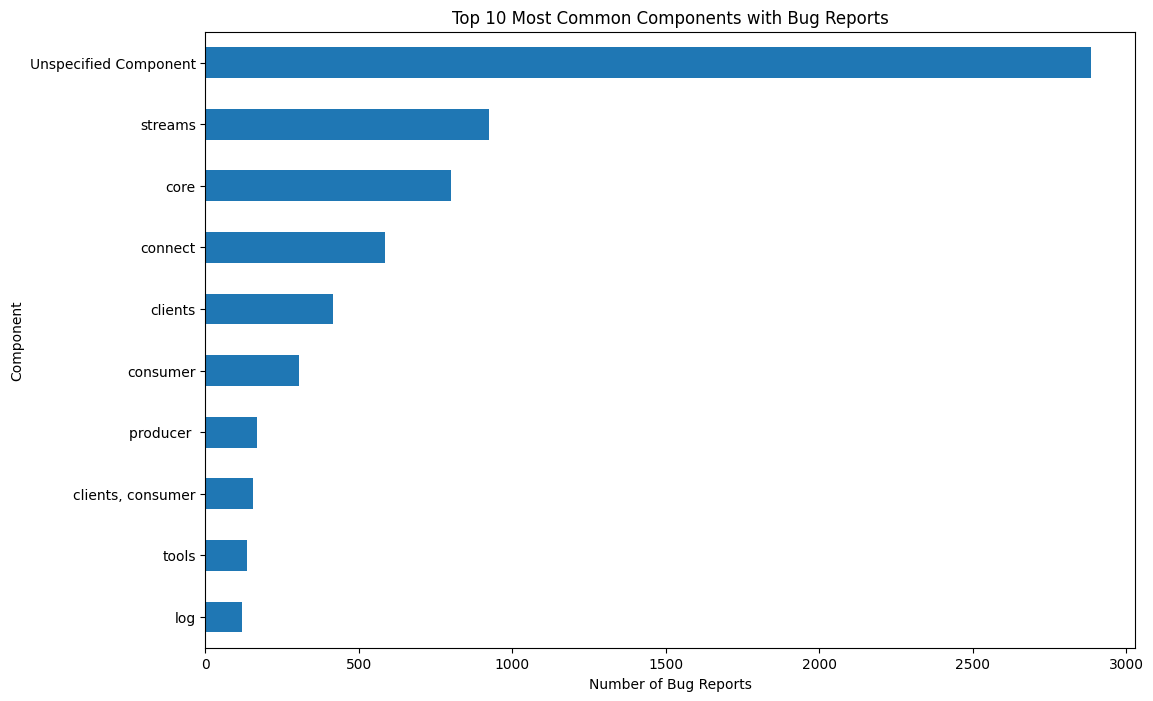

In [4]:
# Count the occurrences of each component
top_components = df_cleaned['components'].value_counts().head(10)

# Print the top 10 components
print("Top 10 Most Common Components:")
print(top_components)

# Create a bar chart for visualization
plt.figure(figsize=(12, 8))
top_components.plot(kind='barh', title='Top 10 Most Common Components with Bug Reports')
plt.xlabel('Number of Bug Reports')
plt.ylabel('Component')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest at the top
plt.show()

Process Improvement Opportunity: The single largest category of bugs is "Unspecified Component," which accounts for over 2,800 reports. This isn't a software problem; it's a process problem. As a consultant, you could highlight that this shows a lack of a clear bug-tagging system, making it difficult for the team to properly prioritize and track issues.

Most Unstable Components: Aside from the unspecified category, the streams, core, and connect components have the highest number of bug reports. This directly tells the software team that these areas are the most complex or unstable and require the most attention. You could recommend allocating more testing resources or developers to these specific components.

In [5]:
# Create a list of the top 10 components for filtering
top_10_components_list = top_components.index.tolist()

# Filter the DataFrame to include only these components
df_top_components = df_cleaned[df_cleaned['components'].isin(top_10_components_list)].copy()

# Calculate the average time to resolve for each of the top components
# We only want to analyze resolved bugs, so we'll drop NA values in time_to_resolve_days
avg_resolution_time = df_top_components.dropna(subset=['time_to_resolve_days']).groupby('components')['time_to_resolve_days'].mean().sort_values(ascending=False)

# Print the results
print("Average Bug Resolution Time (in days) for Top Components:")
print(avg_resolution_time)

Average Bug Resolution Time (in days) for Top Components:
components
log                      301.628571
producer                 296.239316
tools                    219.300971
consumer                 214.956098
connect                  204.015054
core                     186.513605
clients                  171.025830
Unspecified Component    148.438104
streams                  139.024204
clients, consumer         84.975207
Name: time_to_resolve_days, dtype: float64


High-Volume vs. High-Effort Bugs: The components with the highest average resolution times (log, producer, tools) are not the ones with the most bugs. This suggests that while log bugs are rare, they are incredibly complex or a very low priority, and thus take nearly a year on average to fix!

Team Efficiency: Conversely, the streams component, which had a very high bug count, has one of the lowest average resolution times. This indicates the development team is highly responsive and efficient at fixing these particular bugs, likely because they are a top priority.

The "Unspecified" Anomaly: The "Unspecified Component" bugs have a lower-than-average resolution time. This is an interesting finding—it suggests that while these bugs aren't properly categorized at the start, they are still being addressed relatively quickly once they are picked up by the development team.